In [1]:
#Importamos las librerias que vamos a necesitar
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
#PUNTO 7

#datos que necesitamos para iniciar el programa
#N -> número de pasos

N = 1000

#Función de la caminata aleatora
def random_walk (N):
    
    #posición inicial
    r = 0
    
    #posible paso
    pasos_posibles = [1, -1]
    
    #avance para cada uno de los pasos
    for i in range(1, N+1):
        
        #elección aleatoria de la dirección del paso (con igual probabilidad de ir hacia la derecha o hacia la izquierda)
        paso = np.random.choice(pasos_posibles)
        
        #posición
        r += paso
        
    return r

#Generar un histograma

#M -> numero de veces que correremos la función
M = 10000

#creamos una función para generar un array de los valores de la posición 
def R_fun(M):

    #array de los valores de r
    R = np.zeros(M)

    #correr la función M veces
    for i in range(M):
        r = random_walk(N)
        R[i] = r
        
    return R

In [3]:
Datos = R_fun(M)

In [4]:
#teorema del límite central
def TLC(std, x):
    a = np.sqrt(2*np.pi)*std
    b = 2*(std**2)
    c = -(x)**2
    
    funcion = (1/a)*(np.exp(c/b))
    
    return funcion

In [5]:
#creamos los datos que siguen el teorema del límite central
evaluacion = []
rango = np.linspace(-150, 150, 1000)
for i in rango:
    dato = TLC(2*np.sqrt(N/4), i)
    evaluacion.append(dato)
evalucion = np.array(evaluacion)

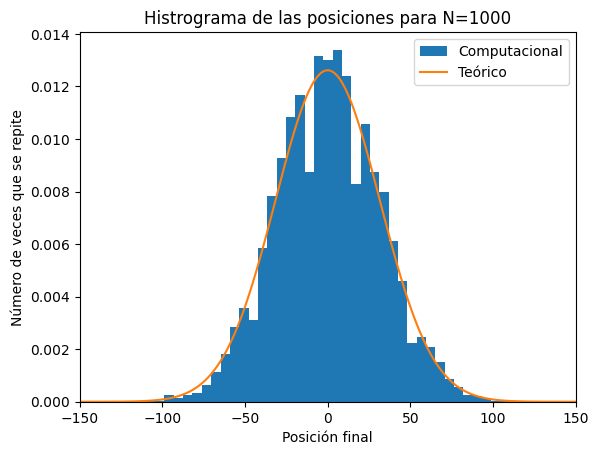

In [6]:
#creamos el histograma de R
plt.hist(Datos, density=True, bins = 40, label='Computacional')
plt.xlim(-150, 150)
plt.plot(rango, evaluacion, label='Teórico')
plt.title('Histrograma de las posiciones para N=1000')
plt.xlabel('Posición final')
plt.ylabel('Número de veces que se repite')
plt.legend()

In [7]:
#PUNTO 8

#array de valores de N que vamos a utilizar
N_array = np.linspace(50, 1000, num=20)

#creamos los arrays de los promedios de <r> y <r^2>
Prom_r = np.zeros(20)
Prom_r2 = np.zeros(20)

#calculamos r para cada uno de los valores de N
for i in range(20):
    N = int(N_array[i])
    M = 1000
    
    R_ = R_fun(M)
    R_2 = R_*R_
    
    #calculamos <r> y <r^2>
    Prom_r[i] = np.mean(R_)
    Prom_r2[i] = np.mean(R_2)

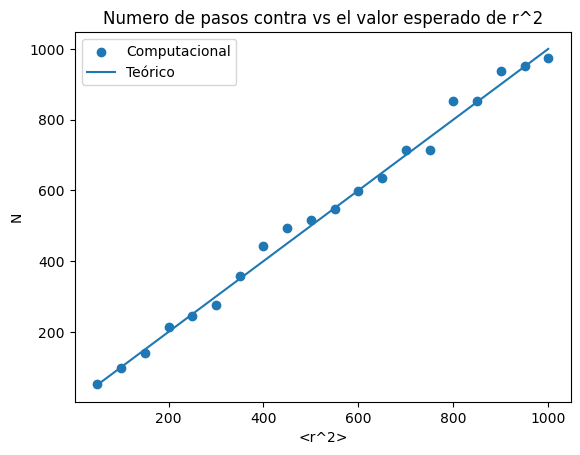

In [8]:
# Graficación
plt.figure()
plt.scatter(N_array, Prom_r2, label='Computacional')
plt.plot(np.linspace(50, 1000, 1000), np.linspace(50, 1000, 1000), label='Teórico')
plt.title('Numero de pasos contra vs el valor esperado de r^2')
plt.xlabel('<r^2>')
plt.ylabel('N')
plt.legend()

In [9]:
#Calcular el valor de D
#t -> tiempo en el que debe dar un paso
#a -> longitud de cada paso

t = 1
a = 1
N = 1000

D_com = np.var(Datos)/(2*1000*t)
D_teo = (a)**2/(2*t)

print ('D_com = ' + str(D_com) + '-> Computacional')
print ('D_teo = ' + str(D_teo) + '-> Teórico')

D_com = 0.481992192-> Computacional
D_teo = 0.5-> Teórico
